In [1]:
import sys
sys.path.append("..")
from src.Utils import read_jsonlines

cues = {}

for i in range(1,5):
    data = read_jsonlines(f"../output/tfidf_sampling/mixtral/dataset{i}_35shot.jsonl")

    for item in data:
        for ent in item["extracted"]:
            label = ent["label"].lower()
            if label in ["title", "performer"]:
                is_correct = ent["utterance"] in item[label + "s"]
            
                if ent["cue"] != '' and ent["cue"] is not None:
                    if not cues.get(label):
                        cues[label] = {}
                        cues[label]["correct"] = []
                        cues[label]["incorrect"] = []
                    cues[label]["correct" if is_correct else "incorrect"].append(ent["cue"])


# Cues --> Correct Entities

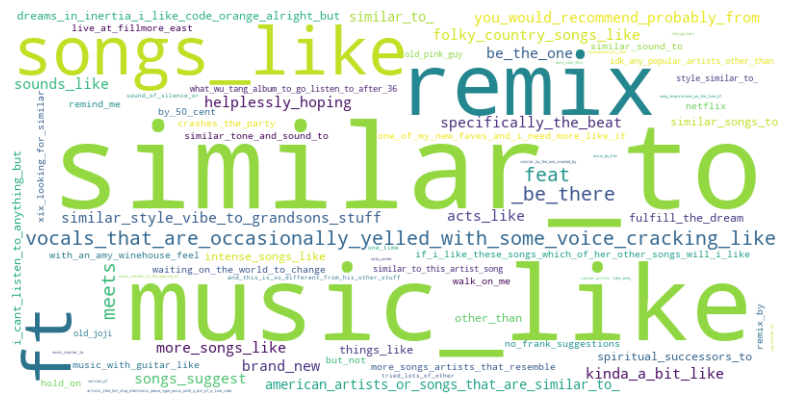

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join([phrase.replace(' ', '_') for phrase in cues["performer"]["correct"]])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.savefig("../figures/cloud_performer_correct.pdf")
plt.show()


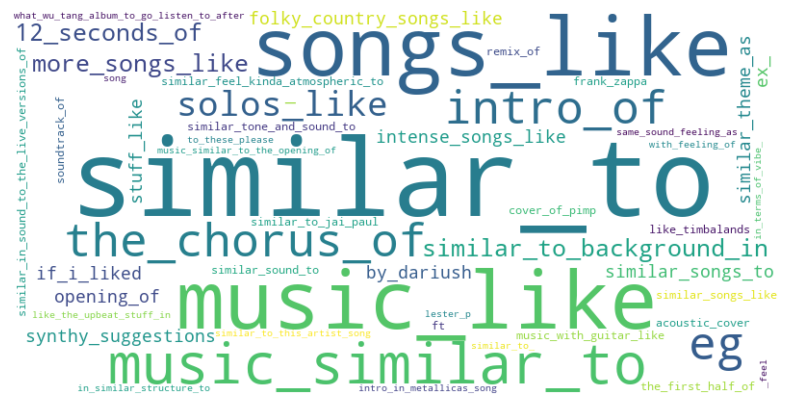

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join([phrase.replace(' ', '_') for phrase in cues["title"]["correct"]])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.savefig("../figures/cloud_title_correct.pdf")
plt.show()


# Cues --> Incorrect Entities

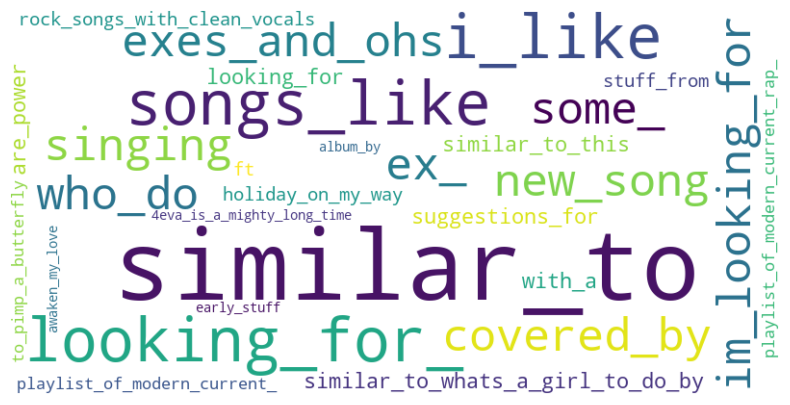

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join([phrase.replace(' ', '_') for phrase in cues["performer"]["incorrect"]])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.savefig("../figures/cloud_performer_incorrect.pdf")
plt.show()


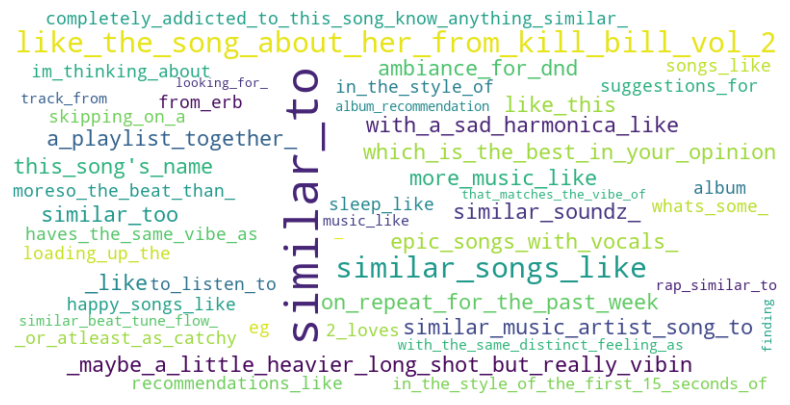

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join([phrase.replace(' ', '_') for phrase in cues["title"]["incorrect"]])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.savefig("../figures/cloud_title_incorrect.pdf")
plt.show()


In [8]:
for label, content in cues.items():
    for outcome, cue_list in content.items():
        print(f"{label}_{outcome}: {len(cue_list)}")

performer_correct: 128
performer_incorrect: 51
title_correct: 73
title_incorrect: 63
